# Imports

In [66]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
import seaborn as sns
import krippendorff
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = 12, 10

In [91]:
df = pd.read_csv('/home/elural/DETESTS-DIS/scripts/train.csv')
df2 = pd.read_csv('/home/elural/DETESTS-DIS/scripts/train_augmented.csv')
#df['stereotype'] = df['stereotype'].apply(lambda x: "Stereotype" if x == 1.0 else "Non-stereotype")
df['implicit'] = df['implicit'].apply(lambda x: "Implicit" if x == 1.0 else "Explicit")
def get_krippendorf_alpha_agreement(annotations):    
    #annotations is a matrix Annotator x annotation on each doc. It can contain NaN VALUES
    return krippendorff.alpha(reliability_data=annotations)


filtered_df = df[df['stereotype'] == 1]
get_krippendorf_alpha_agreement(filtered_df[['implicit_a2', 'implicit_a1']].values.T)

0.1593002890333728

In [64]:
def plot_pie_chart_from_dataframe(df, target_col, title=None, filename=None):
    """
    Plots a pie chart based on the values in a specified column of a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data.
    - target_col (str): The name of the column to be used for the pie chart.
    - title (str): The title of the plot.
    - filename (str): The filename to save the plot.

    Returns:
    None
    """
    # Count the values for the target column
    data = df[target_col].value_counts().sort_index()

    # Get colors from a seaborn palette
    colors = sns.color_palette("deep", len(data))

    plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colors)
    #plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Set the title if provided
    if title:
        plt.title(title)

    # Display the plot
    plt.show()

def plot_normalized_label_frequencies(df, label_columns, title=None):
    """
    Calculates and plots the normalized frequency of specified label columns.

    Parameters:
    df (pd.DataFrame): The input dataframe.
    label_columns (list): The list of label column names to be plotted.
    title (str): The title of the plot.

    Returns:
    None
    """
    # Calculate the sum of each label column
    values = df[label_columns].value_counts(normalize=True).sort_index()

    print(values)
    # Set color palette
    color = sns.color_palette('deep')
    
    values.plot(kind='bar', color=color, xlabel='Valores probabilidad a posteriori', ylabel='Frecuencia', title=title)
    #plt.xlabel('Labels')
    #plt.ylabel('Frequency')
    #plt.ylim(0, 0.65)
    #plt.yticks([i * 0.05 for i in range(15)])
    if title:
        plt.title(title)
    plt.xticks(rotation=45,fontsize=16)
    plt.show()

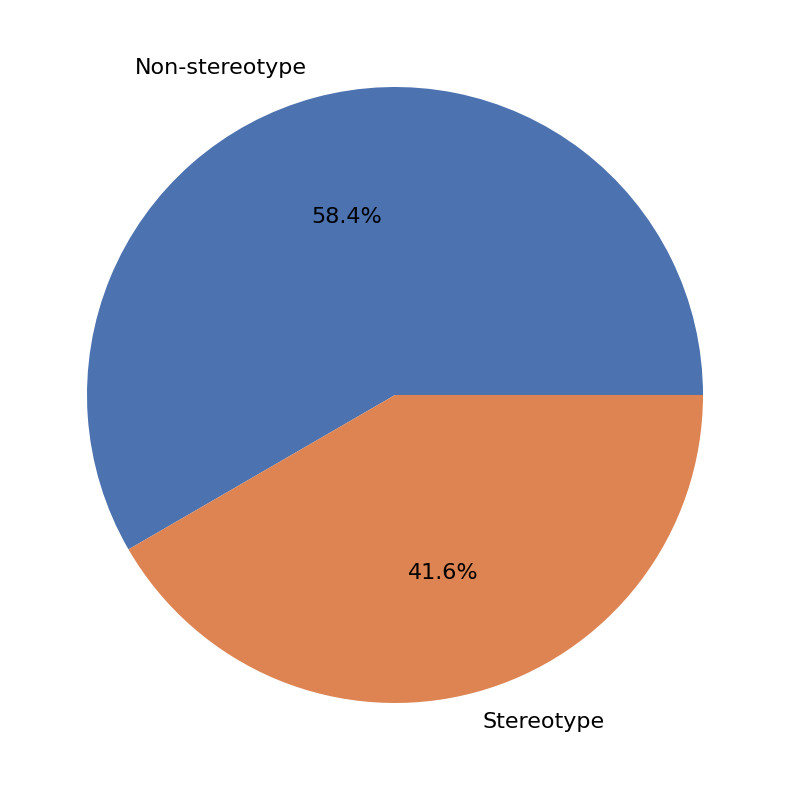

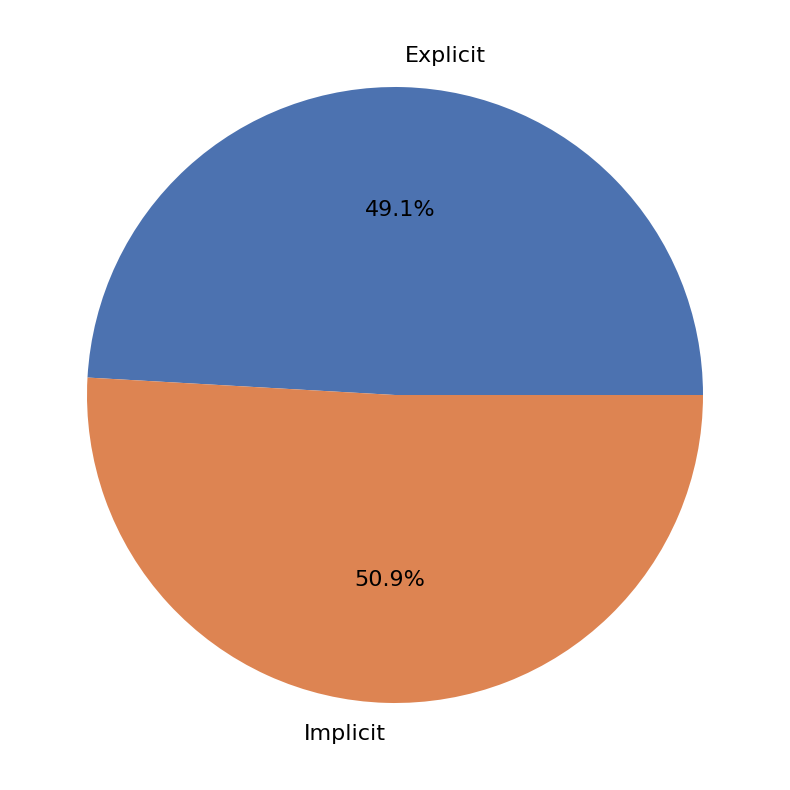

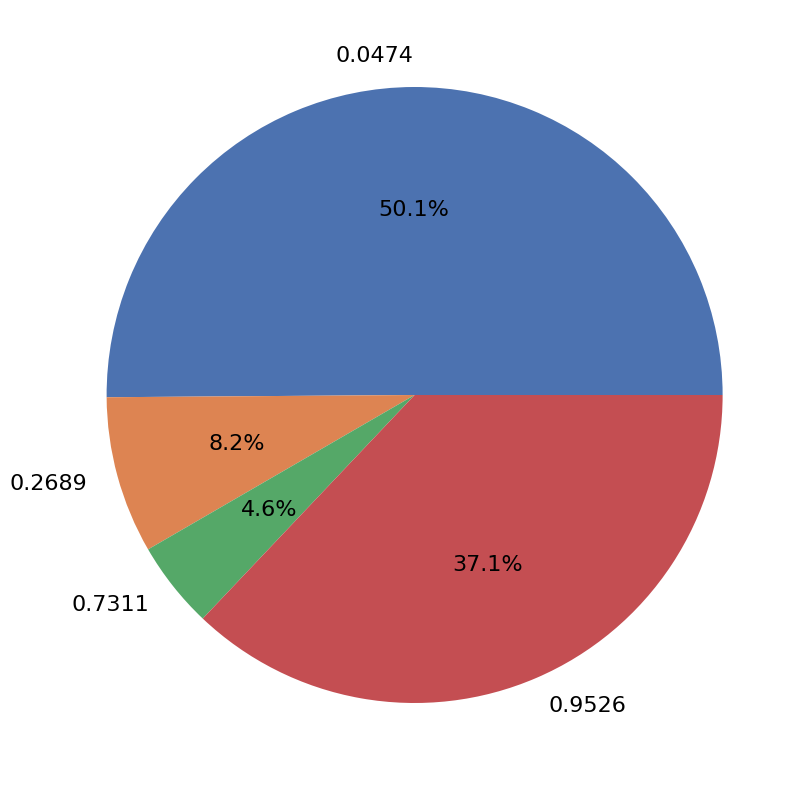

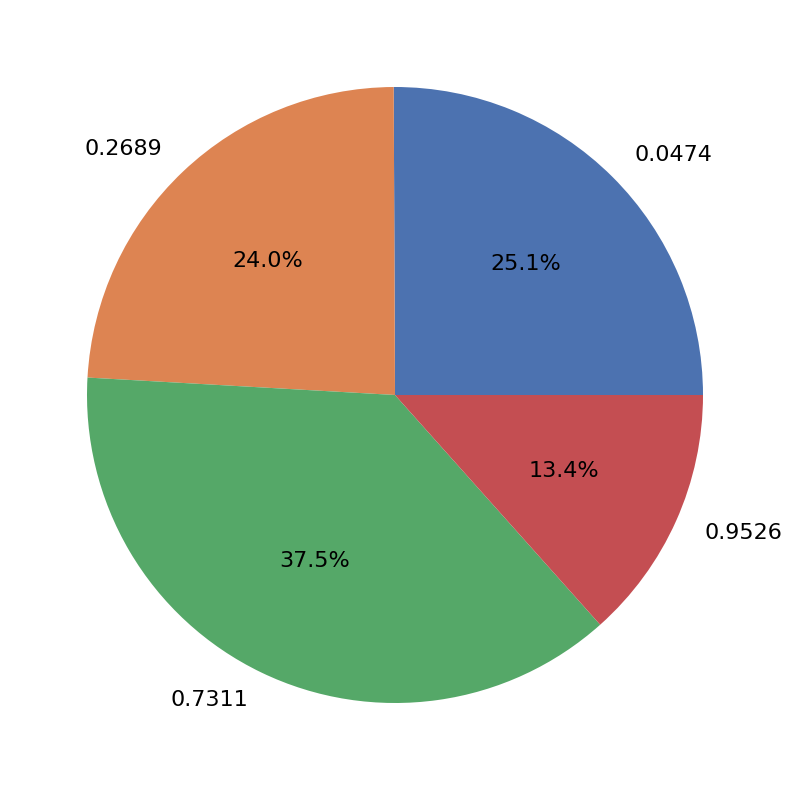

In [65]:

plot_pie_chart_from_dataframe(df, 'stereotype')
plot_pie_chart_from_dataframe(df[df['stereotype'] == 'Stereotype'], 'implicit')
plot_pie_chart_from_dataframe(df, 'stereotype_soft')
plot_pie_chart_from_dataframe(df[df['stereotype'] == 'Stereotype'], 'implicit_soft')

# Read data

In [2]:
data = pd.read_csv('train.csv')

In [11]:
data[(data["stereotype_soft"] >= 0.1) & (data["stereotype_soft"] <= 0.5)]["stereotype_soft"].value_counts()

stereotype_soft
0.2689    1031
Name: count, dtype: int64

## General analysis of data

### Distribution of classes for all the dataset

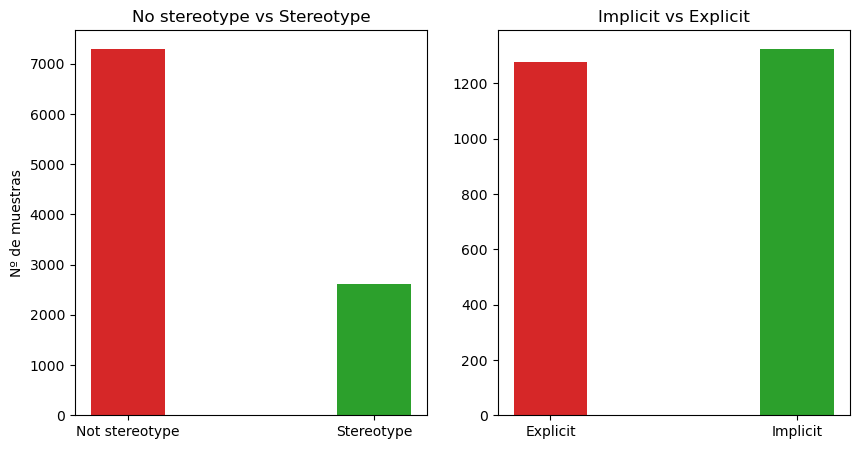

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#Sacamos el hard label de los estereotipos
hard_label_stereotype = data["stereotype"].to_numpy()

#Los labels que tendrá el bar
stereotype_labels = ["Not stereotype", "Stereotype"]
# Nº de muestras de cada clase
stereotype_counts = [ (hard_label_stereotype == 0).sum(), (hard_label_stereotype == 1).sum()]
#Colores para diferenciar cada clase
bar_colors = ["tab:red", "tab:green"]

ax[0].bar(stereotype_labels, stereotype_counts, color=bar_colors, width=0.3)

ax[0].set_ylabel("Nº de muestras")
ax[0].set_title("No stereotype vs Stereotype")


#Sacamos el hard label implicit de las muestras que contienen estereotipos
hard_label_implicit = data[data["stereotype"] == 1]["implicit"].to_numpy()

#Las etiquetas de la tarea
implicit_labels = ["Explicit", "Implicit"]
#Contador
implicit_count = [ (hard_label_implicit == 0).sum(), (hard_label_implicit == 1).sum()]
#Colores
bar_colors = ["tab:red", "tab:green"]

ax[1].bar(implicit_labels, implicit_count, color=bar_colors, width=0.3)
ax[1].set_title("Implicit vs Explicit")

plt.show()

### Distributions per source

#### Distribution on DETESTS dataset

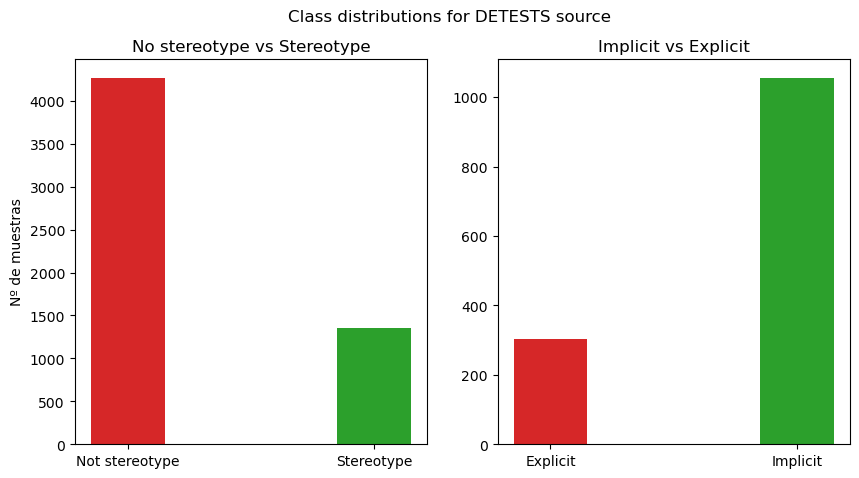

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

detests_data = data[data["source"] == "detests"]

#Sacamos el hard label de los estereotipos
hard_label_stereotype = detests_data["stereotype"].to_numpy()

#Los labels que tendrá el bar
stereotype_labels = ["Not stereotype", "Stereotype"]
# Nº de muestras de cada clase
stereotype_counts = [ (hard_label_stereotype == 0).sum(), (hard_label_stereotype == 1).sum()]
#Colores para diferenciar cada clase
bar_colors = ["tab:red", "tab:green"]

ax[0].bar(stereotype_labels, stereotype_counts, color=bar_colors, width=0.3)

ax[0].set_ylabel("Nº de muestras")
ax[0].set_title("No stereotype vs Stereotype")


#Sacamos el hard label implicit de las muestras que contienen estereotipos
hard_label_implicit = detests_data[detests_data["stereotype"] == 1]["implicit"].to_numpy()

#Las etiquetas de la tarea
implicit_labels = ["Explicit", "Implicit"]
#Contador
implicit_count = [ (hard_label_implicit == 0).sum(), (hard_label_implicit == 1).sum()]
#Colores
bar_colors = ["tab:red", "tab:green"]

ax[1].bar(implicit_labels, implicit_count, color=bar_colors, width=0.3)
ax[1].set_title("Implicit vs Explicit")


fig.suptitle("Class distributions for DETESTS source")
plt.show()

#### Distributions per dataset on StereoHoax

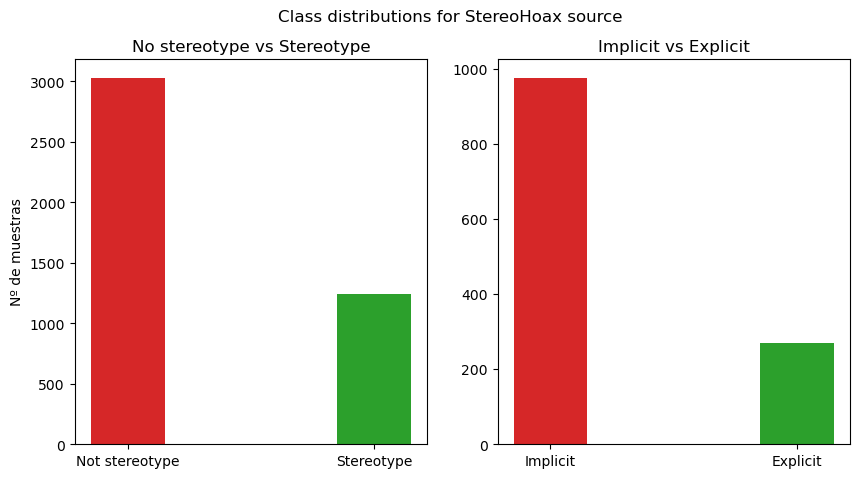

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

stereohoax_data = data[data["source"] == "stereohoax"]

#Sacamos el hard label de los estereotipos
hard_label_stereotype = stereohoax_data["stereotype"].to_numpy()

#Los labels que tendrá el bar
stereotype_labels = ["Not stereotype", "Stereotype"]
# Nº de muestras de cada clase
stereotype_counts = [ (hard_label_stereotype == 0).sum(), (hard_label_stereotype == 1).sum()]
#Colores para diferenciar cada clase
bar_colors = ["tab:red", "tab:green"]

ax[0].bar(stereotype_labels, stereotype_counts, color=bar_colors, width=0.3)

ax[0].set_ylabel("Nº de muestras")
ax[0].set_title("No stereotype vs Stereotype")


#Sacamos el hard label implicit de las muestras que contienen estereotipos
hard_label_implicit = stereohoax_data[stereohoax_data["stereotype"] == 1]["implicit"].to_numpy()

#Las etiquetas de la tarea
implicit_labels = ["Implicit", "Explicit"]
#Contador
implicit_count = [ (hard_label_implicit == 0).sum(), (hard_label_implicit == 1).sum()]
#Colores
bar_colors = ["tab:red", "tab:green"]

ax[1].bar(implicit_labels, implicit_count, color=bar_colors, width=0.3)
ax[1].set_title("Implicit vs Explicit")


fig.suptitle("Class distributions for StereoHoax source")
plt.show()

stereotype_soft
0.0474    3588
0.2689     682
0.7311       4
0.9526    1355
Name: stereotype_soft, dtype: int64


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

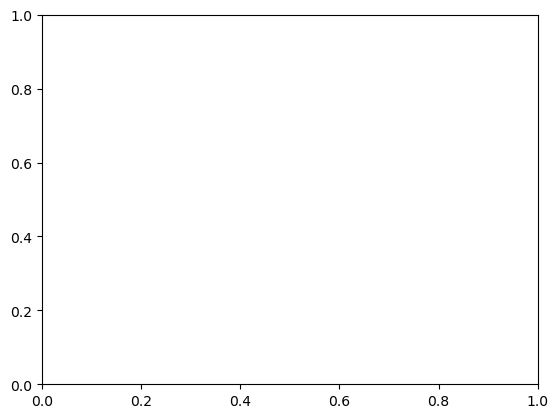

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate your array of probabilities (replace this with your actual array)
probabilities = detests_data.groupby("stereotype_soft")

print(probabilities["stereotype_soft"].count())

# Step 2: Create a histogram plot
plt.hist(probabilities, bins=4, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Text data analysis

In [7]:
#Define tokenizer
tokenizer = AutoTokenizer.from_pretrained("PlanTL-GOB-ES/roberta-base-bne")

#Tokenize each sentence so we get the tokens that will be fed
print(tokenizer.tokenize("#vivavox"))
tokenized_sentences = [tokenizer.tokenize(text) for text in data["text"]]

print("Average length of tokens:", np.mean(list(map(len, tokenized_sentences))))
print("Median length of tokens:", np.median(list(map(len, tokenized_sentences))))
print("Maximum token length:", np.max(list(map(len, tokenized_sentences))))
print("Minimum token length:", np.min(list(map(len, tokenized_sentences))))
print("Std. of token length:", np.std(list(map(len, tokenized_sentences))))
print("percentile 99", np.percentile(list(map(len, tokenized_sentences)), 99))

['#', 'viv', 'av', 'ox']
Average length of tokens: 26.40440137290531
Median length of tokens: 20.0
Maximum token length: 210
Minimum token length: 1
Std. of token length:


In [7]:
#This function concatenates the target text to the context surroinding it
def add_context_to_text(sample, dataset):
    text = sample["text"]
    if sample["source"] == "detests" and sample["level1"] != "0":
        new_text = data.loc[data["id"] == sample["level1"]]["text"].iloc[0]
        text = text + " " + new_text
    
    if sample["level2"] != "0":
        new_text = data.loc[data["comment_id"] == sample["level2"]]["text"].iloc[0]
        text = text + " " + new_text
    
    if sample["level3"] != "0":
        new_text = data.loc[data["comment_id"] == sample["level3"]]["text"].iloc[0]
        text = text + " " + new_text
    
    return text

x = add_context_to_text(data.loc[11], data)
print(x)

Una procesión de semana santa potente hace que toda la ciudad tenga que adaptarse al recorrido. Hoy nadie o casi nadie está obligado a participar en procesiones, llevar medallas... ni meterse a monja. Lo que propones es la expulsión de toda persona musulmana en europa.


In [8]:
text_with_context = data.apply(lambda x: add_context_to_text(x, data), axis=1).values
tokenized_sentences = [tokenizer.tokenize(text) for text in text_with_context]

print("Average length of tokens:", np.mean(list(map(len, tokenized_sentences))))
print("Median length of tokens:", np.median(list(map(len, tokenized_sentences))))
print("Maximum token length:", np.max(list(map(len, tokenized_sentences))))
print("Minimum token lengthh:", np.min(list(map(len, tokenized_sentences))))

Average length of tokens: 84.06319402382394
Median length of tokens: 80.0
Maximum token length: 365
Minimum token lengthh: 1


In [49]:
import re

def detect_emojis(sample, replacement=""):
    emoji_pattern = re.compile(
        r"[\U0001F600-\U0001F64F]|"  # emoticons
        r"[\U0001F300-\U0001F5FF]|"  # symbols & pictographs
        r"[\U0001F680-\U0001F6FF]|"  # transport & map symbols
        r"[\U0001F1E0-\U0001F1FF]|"  # flags (iOS)
        r"[\U00002500-\U00002BEF]|"  # chinese char
        r"[\U00002702-\U000027B0]|"  # Dingbats
        r"[\U00002702-\U000027B0]|"  # Dingbats
        r"[\U000024C2-\U0001F251]|"  # enclosed characters
        r"[\U0001f926-\U0001f937]|"  # emoji modifiers
        r"[\U00010000-\U0010ffff]|"  # emoticons
        r"[\u2600-\u26FF]|"          # Miscellaneous Symbols
        r"[\u2700-\u27BF]|"          # Dingbats
        r"\uD83C[\uDF00-\uDFFF]|"    # surrogate pair for emojis
        r"\uD83D[\uDC00-\uDE4F]|"    # surrogate pair for emojis
        r"[\uD83D[\uDE80-\uDEFF]]"   # surrogate pair for emojis
        "+", flags=re.UNICODE)

    return emoji_pattern.sub(replacement, sample["text"])

Average length of tokens: 26.691701998788613
Median length of tokens: 21.0
Maximum token length: 214
Minimum token length: 1
Std. of token length:


In [26]:
import re

def replace_bold_with_unicode(text):
    replacements = {
        '𝐀': 'A', '𝐁': 'B', '𝐂': 'C', '𝐃': 'D', '𝐄': 'E', '𝐅': 'F', '𝐆': 'G', '𝐇': 'H', '𝐈': 'I', '𝐉': 'J',
        '𝐊': 'K', '𝐋': 'L', '𝐌': 'M', '𝐍': 'N', '𝐎': 'O', '𝐏': 'P', '𝐐': 'Q', '𝐑': 'R', '𝐒': 'S', '𝐓': 'T',
        '𝐔': 'U', '𝐕': 'V', '𝐖': 'W', '𝐗': 'X', '𝐘': 'Y', '𝐙': 'Z',
        '𝐚': 'a', '𝐛': 'b', '𝐜': 'c', '𝐝': 'd', '𝐞': 'e', '𝐟': 'f', '𝐠': 'g', '𝐡': 'h', '𝐢': 'i', '𝐣': 'j',
        '𝐤': 'k', '𝐥': 'l', '𝐦': 'm', '𝐧': 'n', '𝐨': 'o', '𝐩': 'p', '𝐪': 'q', '𝐫': 'r', '𝐬': 's', '𝐭': 't',
        '𝐮': 'u', '𝐯': 'v', '𝐰': 'w', '𝐱': 'x', '𝐲': 'y', '𝐳': 'z',
        '𝟎': '0', '𝟏': '1', '𝟐': '2', '𝟑': '3', '𝟒': '4', '𝟓': '5', '𝟔': '6', '𝟕': '7', '𝟖': '8', '𝟗': '9'
    }

    pattern = re.compile('|'.join(map(re.escape, replacements)))
    return pattern.sub(lambda match: replacements[match.group(0)], text)

# Example usage:
text = "This is an example of bold letters: 𝐀𝐁𝐂𝐃𝐄𝐅𝐆𝐇𝐈𝐉𝐊𝐋𝐌𝐍𝐎𝐏𝐐𝐑𝐒𝐓𝐔𝐕𝐖𝐗𝐘𝐙 and bold numbers: 𝟎𝟏𝟐𝟑𝟒𝟓𝟔𝟕𝟖𝟗"
replaced_text = replace_bold_with_unicode(text)
print(replaced_text)


This is an example of bold letters: ABCDEFGHIJKLMNOPQRSTUVWXYZ and bold numbers: 0123456789


In [36]:
# Example usage:
text = "This is an example of bold letters: 𝐀𝐁𝐂𝐃𝐄𝐅𝐆𝐇𝐈𝐉𝐊𝐋𝐌𝐧𝐎𝐏𝐐𝐑𝐒𝐓𝐔𝐕𝐖𝐗𝐘𝐙𝐚𝐛𝐜𝐝𝐞𝐟𝐠𝐡𝐢𝐣𝐤𝐥𝐦 and bold numbers: 𝟎𝟏𝟐𝟑𝟒𝟓𝟔𝟕𝟖𝟗"
replaced_text = replace_bold_with_unicode(data[data["id"] == "s_3832"]["text"].values[0])
print(replaced_text)


Vaya por Dios, otro "EXTRANJERO"... URL
